## [Reading WKT and plotting with Pyplot](https://www.kaggle.com/torrinos/exploration-and-plotting/script)

In [72]:
import pandas as pd
import numpy as np
from shapely import wkt
from shapely.geometry.multipolygon import MultiPolygon
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

## Shape of the data

For each image in the dataframe, there are 10 rows - one for each class - that contain the image masks. The image masks are the areas in the image that belong to a particular class and are represented by `MultiPolygon`'s.

In [51]:
df = pd.read_csv('dataset/train_wkt_v4.csv')
df.head(22)

ImageId  ClassType                                    MultipolygonWKT
0   6040_2_2          1                                 MULTIPOLYGON EMPTY
1   6040_2_2          2                                 MULTIPOLYGON EMPTY
2   6040_2_2          3                                 MULTIPOLYGON EMPTY
3   6040_2_2          4  MULTIPOLYGON (((0.003025 -0.007879000000000001...
4   6040_2_2          5  MULTIPOLYGON (((0.005311 -0.009044999999999999...
5   6040_2_2          6                                 MULTIPOLYGON EMPTY
6   6040_2_2          7                                 MULTIPOLYGON EMPTY
7   6040_2_2          8                                 MULTIPOLYGON EMPTY
8   6040_2_2          9                                 MULTIPOLYGON EMPTY
9   6040_2_2         10                                 MULTIPOLYGON EMPTY
10  6120_2_2          1  MULTIPOLYGON (((0.000439 -0.009039999999999999...
11  6120_2_2          2  MULTIPOLYGON (((0.009154000000000001 -0.008422...
12  6120_2_2          3  MULTIPOLYGON (((0.001095 -0.007676, 0.001103 -...
13  6120_2_2          4  MULTIPOLYGON (((0.007424 -0.008459, 0.007436 -...
14  6120_2_2          5  MULTIPOLYGON (((0.000494 -0.008805, 0.00048 -0...
15  6120_2_2          6  MULTIPOLYGON (((0.000292 -0.003056, 0.000201 -...
16  6120_2_2          7                                 MULTIPOLYGON EMPTY
17  6120_2_2          8  MULTIPOLYGON (((0.008354 -0.005124, 0.008357 -...
18  6120_2_2          9  MULTIPOLYGON (((0.000744 -0.00886, 0.000783 -0...
19  6120_2_2         10  MULTIPOLYGON (((0.001148 -0.008973999999999999...
20  6120_2_0          1  MULTIPOLYGON (((0.005324 -0.002879, 0.005327 -...
21  6120_2_0          2  MULTIPOLYGON (((0.00472 -0.008395, 0.004746 -0...

In [54]:
image = df[df.ImageId == '6120_2_2']
image

ImageId  ClassType                                    MultipolygonWKT
10  6120_2_2          1  MULTIPOLYGON (((0.000439 -0.009039999999999999...
11  6120_2_2          2  MULTIPOLYGON (((0.009154000000000001 -0.008422...
12  6120_2_2          3  MULTIPOLYGON (((0.001095 -0.007676, 0.001103 -...
13  6120_2_2          4  MULTIPOLYGON (((0.007424 -0.008459, 0.007436 -...
14  6120_2_2          5  MULTIPOLYGON (((0.000494 -0.008805, 0.00048 -0...
15  6120_2_2          6  MULTIPOLYGON (((0.000292 -0.003056, 0.000201 -...
16  6120_2_2          7                                 MULTIPOLYGON EMPTY
17  6120_2_2          8  MULTIPOLYGON (((0.008354 -0.005124, 0.008357 -...
18  6120_2_2          9  MULTIPOLYGON (((0.000744 -0.00886, 0.000783 -0...
19  6120_2_2         10  MULTIPOLYGON (((0.001148 -0.008973999999999999...

In [102]:
df.at[3,'MultipolygonWKT']

'MULTIPOLYGON (((0.003025 -0.007879000000000001, 0.003074 -0.007931000000000001, 0.003123 -0.007996, 0.003182 -0.008052999999999999, 0.003269 -0.008109999999999999, 0.003361 -0.008156999999999999, 0.003422 -0.008188000000000001, 0.003524 -0.008266000000000001, 0.003596 -0.008326999999999999, 0.003729 -0.008423, 0.003829 -0.008477, 0.003933 -0.008541999999999999, 0.004073 -0.008629, 0.004158 -0.008673, 0.004286 -0.008737, 0.004382 -0.008763, 0.004464 -0.008789, 0.004578 -0.008809000000000001, 0.004702 -0.008836999999999999, 0.004767 -0.008846, 0.004873 -0.008704999999999999, 0.004997 -0.008562999999999999, 0.00506 -0.008496, 0.005112 -0.008418, 0.005145 -0.008335, 0.005197 -0.008260999999999999, 0.005271 -0.008152, 0.005313 -0.008083, 0.005405 -0.007908999999999999, 0.005465 -0.007781, 0.005516 -0.007685, 0.005536 -0.007665, 0.005567 -0.007635, 0.005599 -0.007575, 0.005628 -0.007546, 0.005732 -0.007474, 0.005852 -0.007395, 0.005949 -0.007328, 0.006065 -0.007284, 0.006261 -0.007232, 0.00

In [73]:
from typing import Dict
# provide type hint for better understanding
polygonsMap: Dict[int, MultiPolygon] = {}

# Get all rows (10 e.g one for each class) of one image
image = df[df.ImageId == '6120_2_2']

for _,row in image.iterrows():
    polygonsMap[row['ClassType']] = wkt.loads(row['MultipolygonWKT'])
    
class_type = image.ClassType[10]
class_type

1

In [66]:
something = polygonsMap[2]
type(something)

shapely.geometry.multipolygon.MultiPolygon

Class Type: 1


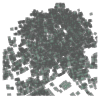

In [67]:
print(f'Class Type: {class_type}')
polygonsMap[class_type]

In [30]:
type(polygonsMap[class_type])

shapely.geometry.multipolygon.MultiPolygon

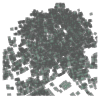

In [27]:
polygonsMap[1]

Class Type: 2


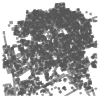

In [22]:
class_type = image.ClassType[11]
print(f'Class Type: {class_type}')
polygonsMap[class_type]

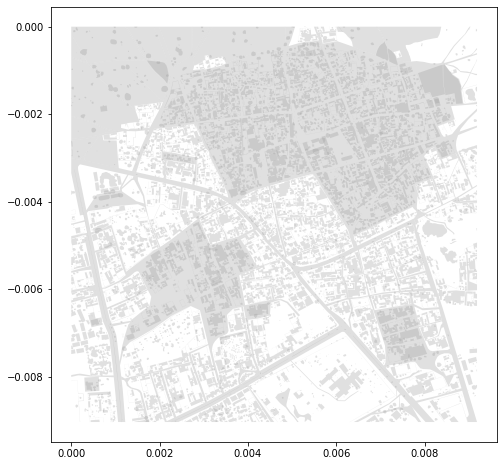

In [28]:
# plot using matplotlib
fig, ax = plt.subplots(figsize=(8, 8))

# plotting, color by class type
for p in polygonsMap:
    for polygon in polygonsMap[p]:
        mpl_poly = Polygon(np.array(polygon.exterior), color=plt.cm.Set1(p*10), lw=0, alpha=0.3)
        ax.add_patch(mpl_poly)

ax.relim()
ax.autoscale_view()

In [79]:
object_mapping = {
    1: 'Buildings',
    2: 'Misc: Manmade structures',
    3: 'Road',
    4: 'Track - poor/dirt/cart track, footpath/trail',
    5: 'Trees - woodland, hedgerows, groups of trees, standalone trees',
    6: 'Crops - contour ploughing/cropland, grain (wheat) crops, row (potatoes, turnips) crops',
    7: 'Waterway',
    8: 'Standing water',
    9: 'Vehicle Large - large vehicle (e:g: lorry, truck,bus), logistics vehicle',
    10:'Vehicle Small - small vehicle (car, van), motorbike',
}

In [81]:
for class_index in polygonsMap:
    print(object_mapping[class_index])

Buildings
Misc: Manmade structures
Road
Track - poor/dirt/cart track, footpath/trail
Trees - woodland, hedgerows, groups of trees, standalone trees
Crops - contour ploughing/cropland, grain (wheat) crops, row (potatoes, turnips) crops
Waterway
Standing water
Vehicle Large - large vehicle (e:g: lorry, truck,bus), logistics vehicle
Vehicle Small - small vehicle (car, van), motorbike


In [90]:
# number of objects on the image by type
'''
1. Buildings
2. Misc. Manmade structures 
3. Road 
4. Track - poor/dirt/cart track, footpath/trail
5. Trees - woodland, hedgerows, groups of trees, standalone trees
6. Crops - contour ploughing/cropland, grain (wheat) crops, row (potatoes, turnips) crops
7. Waterway 
8. Standing water
9. Vehicle Large - large vehicle (e.g. lorry, truck,bus), logistics vehicle
10. Vehicle Small - small vehicle (car, van), motorbike
'''
# for p in polygonsMap:
#     print("Type: {}, objects: {}".format(p,len(polygonsMap[p].geoms)))
for class_index in polygonsMap:
    print('Objects: {:04d}, type: {}'.format(len(polygonsMap[class_index].geoms),object_mapping[class_index]))
    # print(f'Objects: {len(polygonsMap[class_index].geoms)}, type: {object_mapping[class_index]}')

Objects: 1962, type: Buildings
Objects: 3201, type: Misc: Manmade structures
Objects: 0001, type: Road
Objects: 0033, type: Track - poor/dirt/cart track, footpath/trail
Objects: 1452, type: Trees - woodland, hedgerows, groups of trees, standalone trees
Objects: 0020, type: Crops - contour ploughing/cropland, grain (wheat) crops, row (potatoes, turnips) crops
Objects: 0000, type: Waterway
Objects: 0006, type: Standing water
Objects: 0009, type: Vehicle Large - large vehicle (e:g: lorry, truck,bus), logistics vehicle
Objects: 0548, type: Vehicle Small - small vehicle (car, van), motorbike


## Exploring available dataset

Let's look at all available images and see how many objects of which type are there, what is there areas and how these vary from image to image.

In [8]:
# number of images in available kernel dataset?
df.ImageId.unique()

array(['6040_2_2', '6120_2_2', '6120_2_0', '6090_2_0', '6040_1_3',
       '6040_1_0', '6100_1_3', '6010_4_2', '6110_4_0', '6140_3_1',
       '6110_1_2', '6100_2_3', '6150_2_3', '6160_2_1', '6140_1_2',
       '6110_3_1', '6010_4_4', '6170_2_4', '6170_4_1', '6170_0_4',
       '6060_2_3', '6070_2_3', '6010_1_2', '6040_4_4', '6100_2_2'],
      dtype=object)

In [91]:
# convert to shapely, get geometries and pivot
df['polygons'] = df.apply(lambda row: wkt.loads(row.MultipolygonWKT),axis=1)
df['nPolygons'] = df.apply(lambda row: len(row['polygons'].geoms),axis=1)

pvt = df.pivot(index='ImageId', columns='ClassType', values='nPolygons')
pvt

ClassType    1     2   3   4     5   6   7   8   9    10
ImageId                                                 
6010_1_2      0    44   0  12  1733   0   0   0   0    0
6010_4_2      0     0   0   6  2262   0   0   0   0    0
6010_4_4      0     0   0   0  3860   0   0   0   0    0
6040_1_0      0     0   0   5  2446   0   0   0   0    0
6040_1_3      0     0   0   1  3982   2   0   0   0    0
6040_2_2      0     0   0   2  3879   0   0   0   0    0
6040_4_4      0     0   0   7  1901   0   0   0   0    0
6060_2_3     62   173   0   7  1613  86   0   0   0    1
6070_2_3    109    81   2   0    41   0  24   3   0   13
6090_2_0      0    11   0   3  2308   7   0  19   0    1
6100_1_3   2208  1581   1  13   823   3   0   4  11  129
6100_2_2    633   454   1  27   878  11   4   1  13  101
6100_2_3   1690  1226   2  24   574   0   0   2  14  126
6110_1_2   1584  1420   1  10   855  28   0  63   0   23
6110_3_1    581   706   1  19  1239  35   0   9   3   25
6110_4_0    437   502   2  11  1406  29   0  24   7   13
6120_2_0    573  1193   1   4  1542  67   0   0   6   11
6120_2_2   1962  3201   1  33  1452  20   0   6   9  548
6140_1_2   1607  1111   1   9   817  27   0  75   0   23
6140_3_1    565   563   1  19  1110  37   0   9   3   46
6150_2_3      0    47   0   4  2060  68   0   0   0    0
6160_2_1      0     0   0   8  2432   0   0   0   0    0
6170_0_4      0     1   0   9  2774   0   0   8   0    0
6170_2_4      0     1   0   4  2115   2   0   1   0    0
6170_4_1      0     0   0   2  4245   0   0   0   0    0

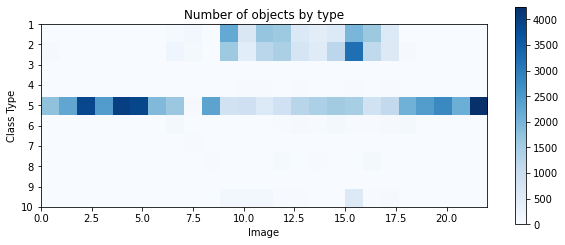

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_aspect('equal')
plt.imshow(pvt.T, interpolation='nearest', cmap=plt.cm.Blues, extent=[0,22,10,1])
plt.yticks(np.arange(1, 11, 1.0))
plt.title('Number of objects by type')
plt.ylabel('Class Type')
plt.xlabel('Image')
plt.colorbar()
plt.show()

Numbers-wise trees are leading by far, being the only major object type on some of the images. They are followed by buildings and other man structures, which are actually not present on every image, as well as vehicles. Waterways are present on only one image, which actually was added in v2 of WKT file, added after the first version of this kernel was published. 

Visually there also appears to be a correlation between the number of trees and buildings/structures.

In [11]:
from scipy.stats import pearsonr
print("Trees vs Buildings: {:5.4f}".format(pearsonr(pvt[1],pvt[5])[0]))
print("Trees vs Buildings and Structures: {:5.4f}".format(pearsonr(pvt[1]+pvt[2],pvt[5])[0]))

Trees vs Buildings: -0.5830
Trees vs Buildings and Structures: -0.5470


Indeed there is a medium strength negative correlation, which however may be specific to the given training dataset.

## Plot all images

There are 22 images in train_wkt_v2.csv file.

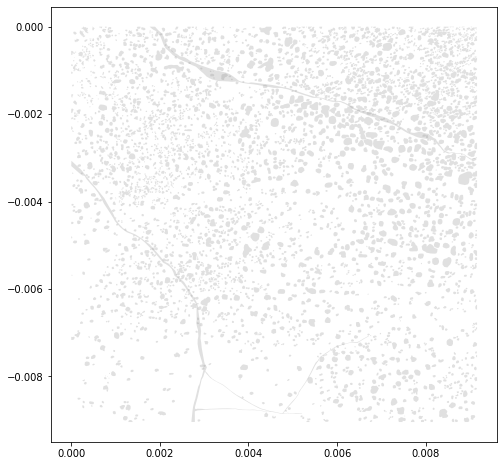

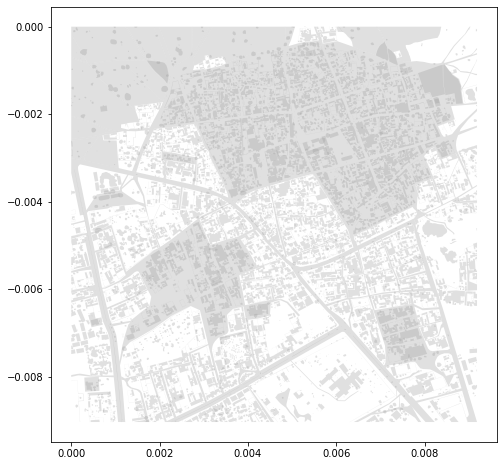

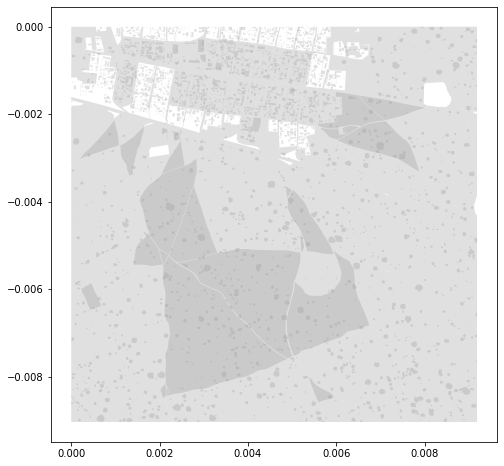

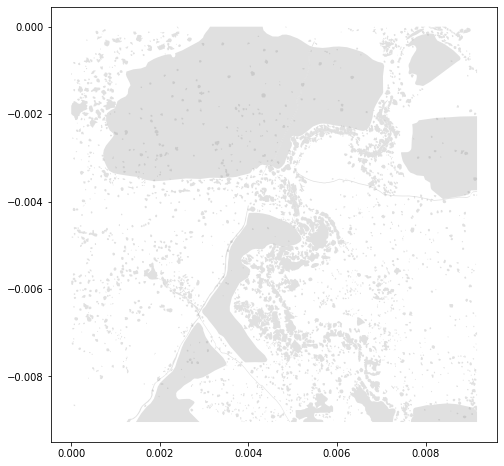

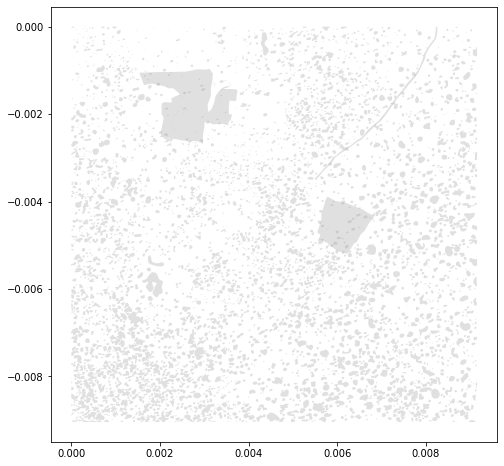

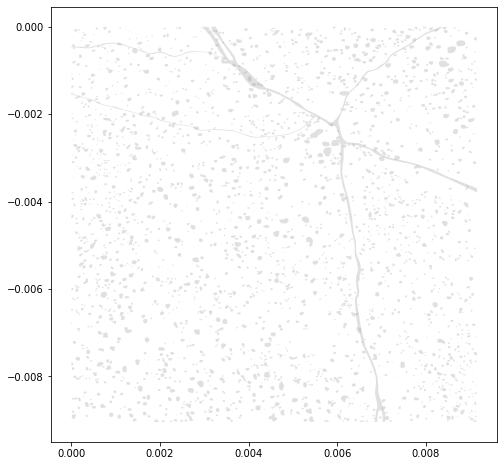

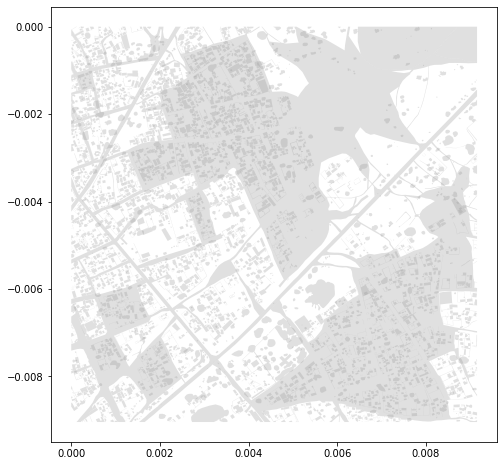

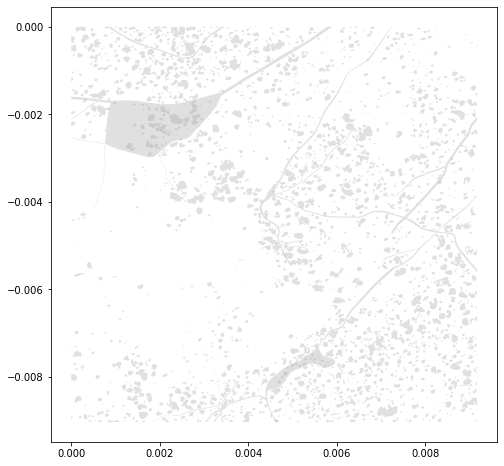

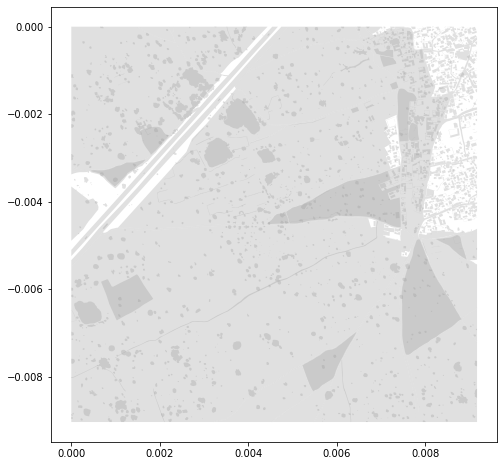

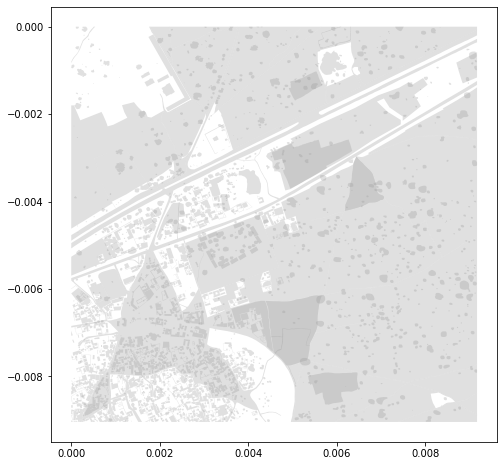

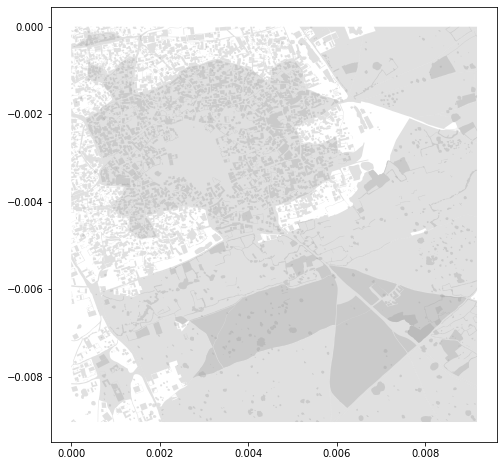

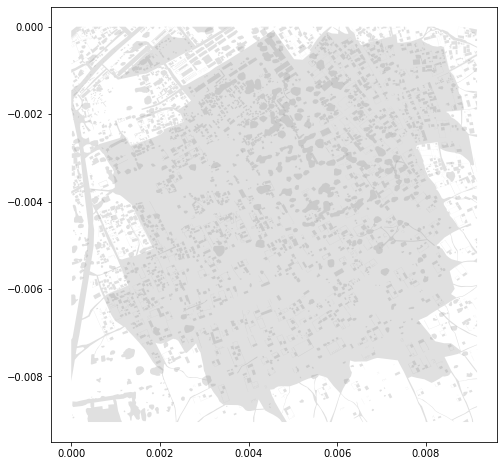

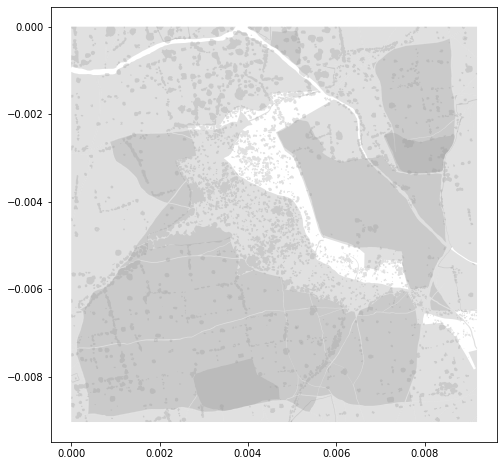

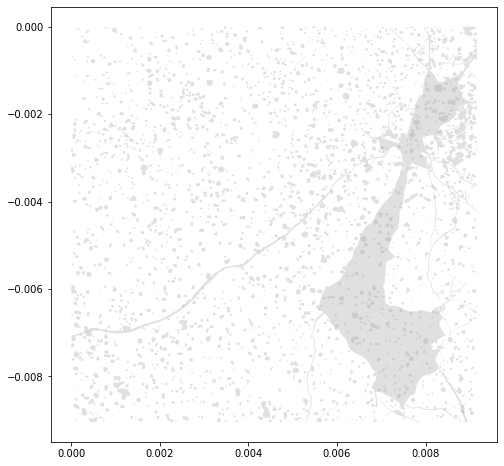

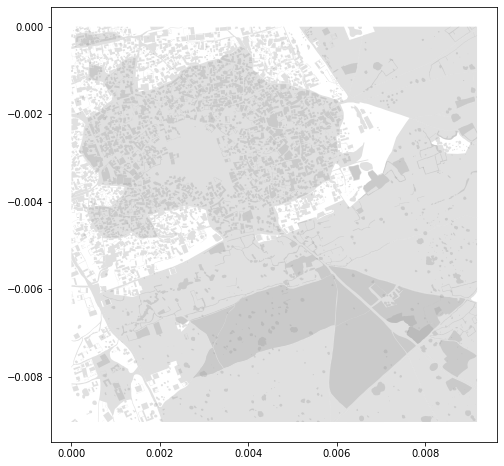

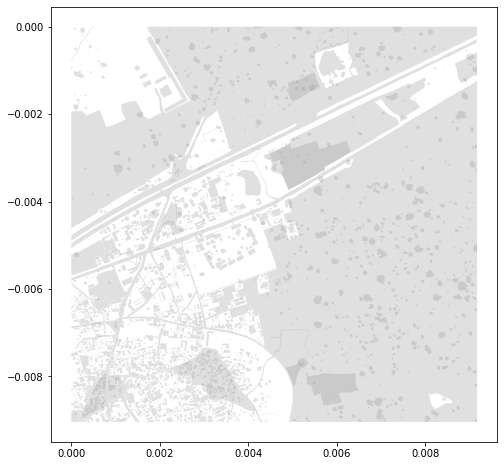

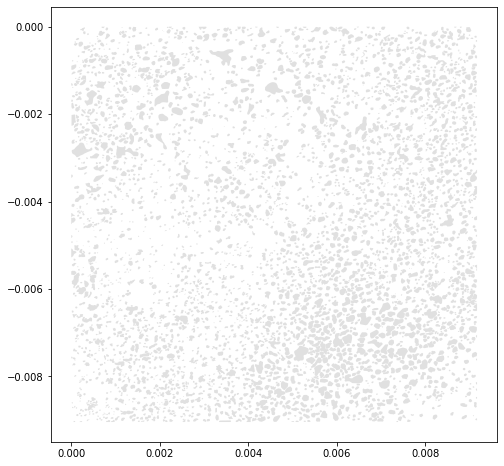

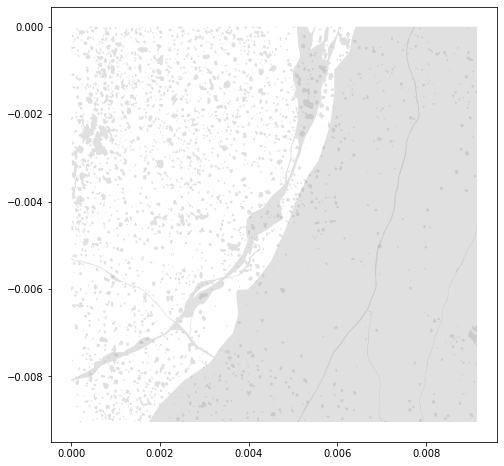

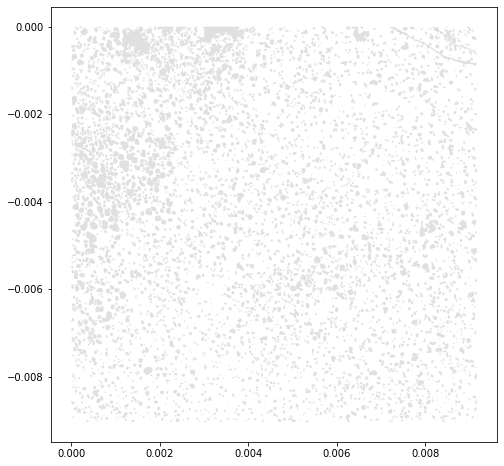

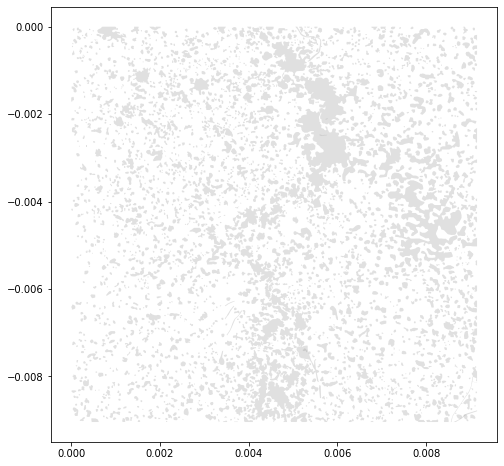

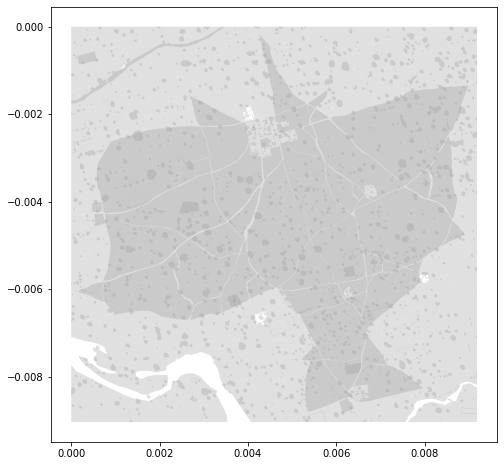

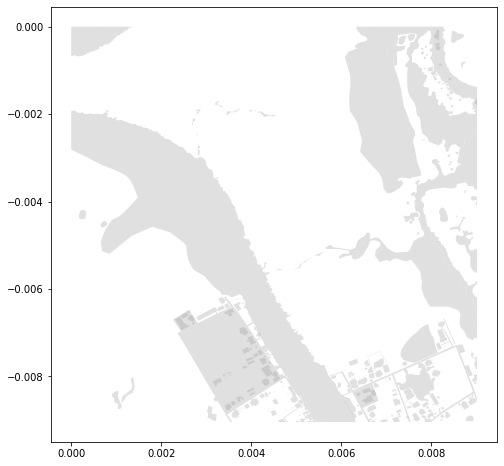

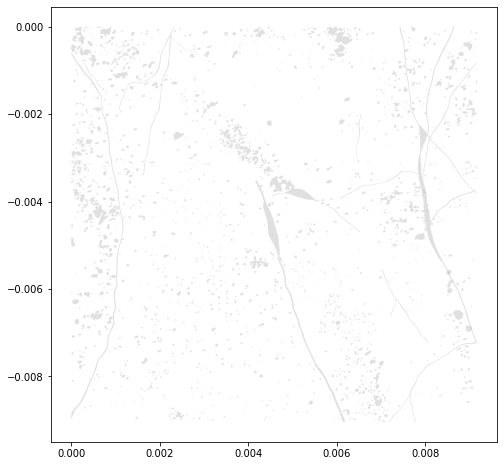

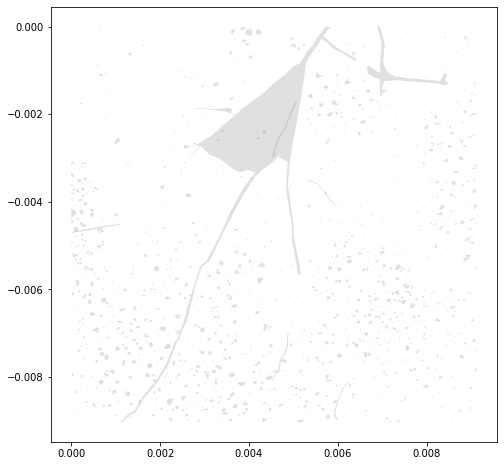

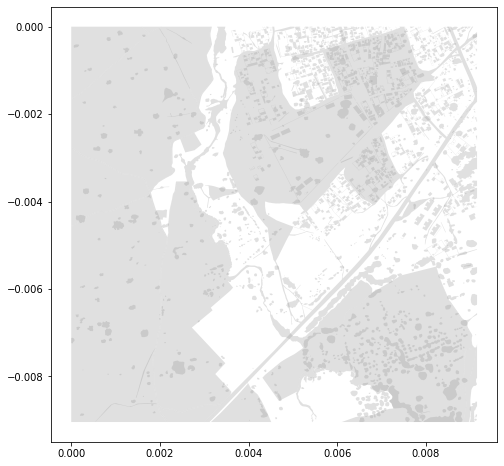

In [12]:
for im in df.ImageId.unique():
    image = df[df.ImageId == im]
    for cType in image.ClassType.unique():
        polygonsMap[cType] = wkt.loads(image[image.ClassType == cType].MultipolygonWKT.values[0])
    
    # plot using matplotlib
    fig, ax = plt.subplots(figsize=(8, 8))

    # plotting, color by class type
    for p in polygonsMap:
        for polygon in polygonsMap[p]:
            mpl_poly = Polygon(np.array(polygon.exterior), color=plt.cm.Set1(p*10), lw=0, alpha=0.3)
            ax.add_patch(mpl_poly)

    ax.relim()
    ax.autoscale_view()
    plt.show()

## Reading tif Files

GDAL nor tifffile are available in kernels, so we'll have to use numpy with PIL or scipy. 

We'll work with one image only. By the way, the files available in "sixteen_band" folder for kernel are not exactly the same as the one for which we have polygons available in train_wkt_v2.csv file.

In [ ]:
# from PIL import Image
file='dataset/sixteen_band/6120_2_2_A.tif'
#imBandA = Image.open(rb'../input/three_band/6120_2_2.tif')
#imBandA.show()

#from scipy import misc
#raster = misc.imread('../input/sixteen_band/6120_2_2_A.tif')
#type(raster)

import os
os.listdir('dataset/three_band')

with open('dataset/three_band/6120_2_2.tif',encoding='utf-8', errors='ignore') as f:
    print(f.readlines())

imarray = plt.imread('image.tif')